# Functions - Argument Passing

the way that objects are sent to functions as inputs. Arguments (a.k.a. parameters) are assigned to names in a function, but they have more to do with object references than with variable scopes. 

## Argument-Passing Basics

**Immutable arguments** are effectively passed “by value.” Objects such as **integers** and **strings** are passed by object reference instead of by copying, but because you can’t change immutable objects in place anyhow, the effect is much like making a copy.


**Mutable arguments** are effectively passed “by pointer.” Objects such as **lists** and **dictionaries** are also passed by object reference, which is similar to the way C passes arrays as pointers—mutable objects can be changed in place in the function, much like C arrays.

**immutable example:**

In [2]:
a = 88
def f(a):                 # a is assigned to (references) the passed object
    a = 99                # Changes local variable a only
    print ('local:',a)
f(a)
print ('global:',a)

local: 99
global: 88


In [3]:
b = 88
f(b)                     
print(b)                  # b is not changed

local: 99
88


In [4]:
a # local

88

**mutable example:**

In [5]:
def changer(a, b):        # Arguments assigned references to objects
    print ('inside the function a:%s,b:%s'%(a,b))
    a = 2                 # Changes local name's value only
    b[0] = 'spam'         # Changes shared object in place 
    print ('update complete.')
    print ('inside the function a:%s,b:%s'%(a,b)) #%s is a string 

In [6]:
X = 1
L = [1, 2]                # Caller:
changer(X, L)             # Pass immutable and mutable objects

inside the function a:1,b:[1, 2]
update complete.
inside the function a:2,b:['spam', 2]


In [7]:
X, L                      # X is unchanged, L is different!

(1, ['spam', 2])

**`return` example:**

In [16]:
def multiple(x, y):
    x = 2               # Changes local names only
    y = [3, 4]
    return x, y         # Return multiple new values in a tuple

In [24]:
X = 1
L = [1, 2]
X, L = multiple(X, L)   # Assign results to caller's names
X, L

(2, [3, 4])

In [25]:
print(X)
print(L)

2
[3, 4]


In [27]:
print(X,L)

2 [3, 4]


In [30]:
print(X*L)

[3, 4, 3, 4]


## Argument Matching 
- Positionals: matched from left to right
- Keywords: matched by argument name
- Defaults: specify values for optional arguments that aren’t passed
- Varargs (args) collecting: collect arbitrarily many positional or keyword arguments
- Varargs unpacking: pass arbitrarily many positional or keyword arguments
- Keyword-only arguments (kwarg): arguments that must be passed by name

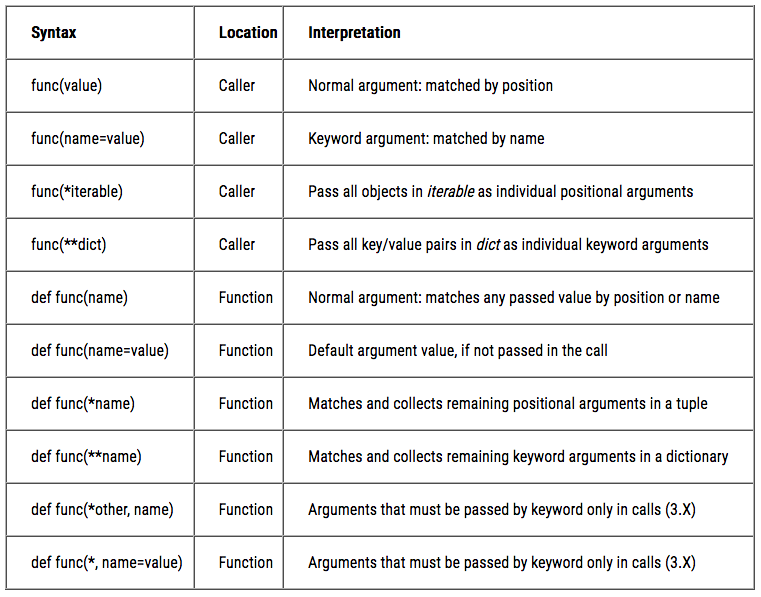

**Rules:**

1.    Assign nonkeyword arguments by position.
2.    Assign keyword arguments by matching names.
3.    Assign extra nonkeyword arguments to *name tuple.
4.    Assign extra keyword arguments to **name dictionary.
5.    Assign default values to unassigned arguments in header.

### Keyword and Default Examples 

In [31]:
def f(a, b, c): print(a, b, c)
f(1, 2, 3)

1 2 3


In [38]:
f(c=3, b=2, a=1)

1 2 3


In [39]:
f(1, c=3, b=2)            # a gets 1 by position, b and c passed by name, positional arguement first

1 2 3


In [40]:
def f(a, b=2, c=3): print(a, b, c)          # a required, b and c optional

In [41]:
f(1) 

1 2 3


In [42]:
f(a=1)

1 2 3


In [43]:
f(1, 4)                # Override defaults

1 4 3


In [45]:
def func(spam, eggs, toast=0, ham=0):   # First 2 required
    print((spam, eggs, toast, ham))

In [46]:
func('a','b')

('a', 'b', 0, 0)


### Arbitrary Argument Examples

In [57]:
def f(*args): print(args) #*args 

In [58]:
f(1)

(1,)


In [60]:
type(f(1))

(1,)


NoneType

In [59]:
f(1, 2, 3, 4)

(1, 2, 3, 4)


In [61]:
def f(**args): print(args) #** means names and values, recognizes as dictonary

In [62]:
f(a=1, b=2)

{'a': 1, 'b': 2}


In [94]:
def f(a, *pargs, **kargs): print(a, pargs, kargs) 
#'*' in pargs is a positional arguement, '**' in kargs is a keyword arguement

In [93]:
f(1, 2, 3, x=1, y=2)

1 (2, 3) {'x': 1, 'y': 2}


**Calls: Unpacking arguments**

In [65]:
def echo(*args, **kwargs): print(args, kwargs) #* is a tuple ** is a dictionary

In [75]:
pargs = (1, 2)
kwargs = {'a':3, 'b':4}  #dictionarys are defined with a colon, mapping keys to values

echo(*pargs, **kwargs)

(1, 2) {'a': 3, 'b': 4}


In [76]:
def func(a, b, c, d): print(a, b, c, d)

In [77]:
args = (1, 2)

In [78]:
args += (3, 4)
args

(1, 2, 3, 4)

In [79]:
func(*args)  # Same as func(1, 2, 3, 4)

1 2 3 4


In [84]:
func(1, *(2,), c=3, **{'d':4})         # Same as func(1, 2, c=3, d=4)

1 2 3 4


## **Review Questions**:
What is the output of each code snippet and why?

In [85]:
def func(a, b=4, c=5):
    print(a, b, c)
func(1, 2)

1 2 5


In [86]:
def func(a, b, c=5):
    print(a, b, c)

func(1, c=3, b=2)

1 2 3


In [87]:
def func(a, *pargs):
    print(a, pargs)

func(1, 2, 3)

1 (2, 3)


In [88]:
def func(a, **kargs):
    print(a, kargs)

func(a=1, c=3, b=2)

1 {'c': 3, 'b': 2}


In [95]:
def func(a, b, c=3, d=4): 
    print(a, b, c, d)

func(1, *(5, 6))

1 5 6 4


In [96]:
def func(a, b, c): 
    a = 2; b[0] = 'x'; c['a'] = 'y'

l=1; m=[1]; n={'a':0}
func(l, m,  n)
l, m, n

(1, ['x'], {'a': 'y'})

**End**